In [6]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

interactive = False

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)

def init():
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title(f't = {str(time)}')

def step():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

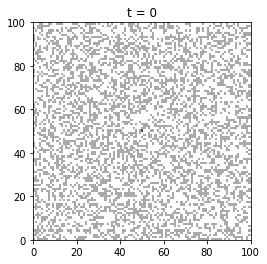

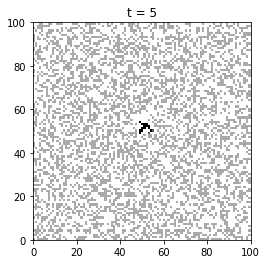

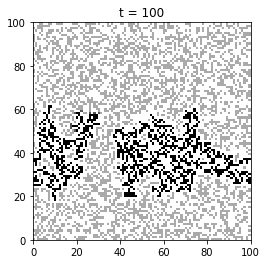

In [7]:
if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_density])
    gui.start(func=[sim.initialize, sim.draw, sim.step])

else:
    # Run the simulator for 100 steps and show some of the steps.
    init()
    draw()
    PL.figure()
    print('')

    for i in range(5):
        step()
    draw()
    PL.figure()
    print('')

    for i in range(95):
        step()
    draw()

### Stretch goal
Modify the forest fire simulation to include a new parameter — an ignition probability, $i$ . Rather than a burning tree automatically igniting an adjacent tree, it will now ignite it with probability $i$ . This is a generalization of the basic forest fire simulation, which corresponds to $i = 1$ . Experiment with different values of the model parameters $q$ and $i$ . What are the critical values of these model parameters? Do a renormalization group analysis on this model and determine approximate theoretical critical values for the model parameters. How well do the theoretical values match your experimental values?

### First, I will incorporate the ignition probability into the code, and call it "burnProb"

In [70]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

interactive = False

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)
test = []

def init():
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title(f't = {str(time)}')

def step():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
                test.append(1)
            elif state == tree:
                num_burning_trees = 0
                burnProb = 0.8 #setting the ignition probability, "burnProb", to 0.8
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            num_burning_trees += 1
                if RD.random() < burnProb*num_burning_trees: #if the random probability is smaller then the  
                                                             #ignition probability, which is determined by the
                                                             #number of burning trees around the subject tree
                    state = fire
                else:
                    state = tree
            nextConfig[y, x] = state
            

    config, nextConfig = nextConfig, config



155


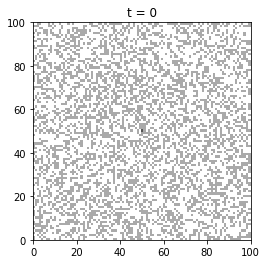

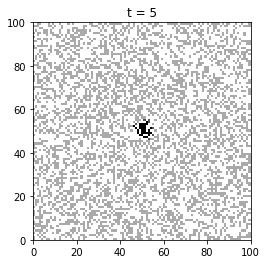

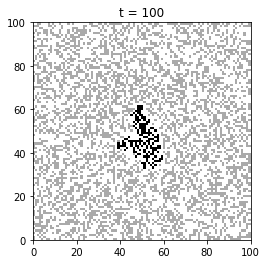

In [71]:
percentage_burned = []

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_density])
    gui.start(func=[sim.initialize, sim.draw, sim.step])

else:
    # Run the simulator for 100 steps and show some of the steps.
    init()
    draw()
    PL.figure()
    print('')

    for i in range(5):
        step()
    draw()
    PL.figure()
    print('')

    for i in range(95):
        step()
    draw()
    print(len(test)) #counting the number of burned trees at the end of 100 time steps

### Second, I will try to model the behavior of the system for different values of the burnProb. To do this, I first run each trial 100 times to get the average percentage burned (because it's very random).  

## *Warning, this can take a long time to run*

In [89]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

interactive = False

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)
test = []

def init():
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title(f't = {str(time)}')

def step():
    global time, config, nextConfig

    time += 1
    
    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
                test.append(1)
            elif state == tree:
                num_burning_trees = 0
                burnProb = 0.7
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            num_burning_trees += 1
                if RD.random() < burnProb*num_burning_trees:
                    state = fire
                else:
                    state = tree
            nextConfig[y, x] = state


    config, nextConfig = nextConfig, config

In [90]:
percentage_burned = []

for trials in range(100):
    init()
    for i in range(100):
        step()
    percentage_burned.append(len(test)/10000)
    
print(percentage_burned)
print(sum(percentage_burned)/len(percentage_burned))

[0.0064, 0.0069, 0.0135, 0.034, 0.0435, 0.0461, 0.0475, 0.0511, 0.0514, 0.062, 0.07, 0.0708, 0.0756, 0.0787, 0.0811, 0.0841, 0.0931, 0.0935, 0.1078, 0.1097, 0.1297, 0.1395, 0.1435, 0.1504, 0.1513, 0.1531, 0.1579, 0.1584, 0.1587, 0.1739, 0.1812, 0.1992, 0.2025, 0.223, 0.2276, 0.2424, 0.2441, 0.2491, 0.252, 0.2572, 0.259, 0.2642, 0.2767, 0.2819, 0.284, 0.2865, 0.2885, 0.2919, 0.3061, 0.3064, 0.3076, 0.3078, 0.3087, 0.3116, 0.325, 0.3255, 0.3286, 0.3374, 0.3375, 0.3376, 0.3377, 0.3401, 0.3508, 0.3583, 0.359, 0.3647, 0.3668, 0.3684, 0.3865, 0.3911, 0.3937, 0.3963, 0.3976, 0.3993, 0.4043, 0.4057, 0.4061, 0.4074, 0.4085, 0.412, 0.4184, 0.4235, 0.425, 0.4259, 0.426, 0.4381, 0.441, 0.443, 0.4432, 0.4536, 0.4659, 0.4709, 0.489, 0.4925, 0.4955, 0.4961, 0.5113, 0.5208, 0.5209, 0.5214]
0.2807029999999999


### As you can see from above, for burnProb = 0.7, the average percentage burned is 0.2807, or 28.7%.

### Then, I will iterate from burnProb values of 0.1 to 1 with steps of 0.1 (0.1, 0.2, 0.3,...,1.0) and plot the graph of that.

Okay, I gotta be honest, that 100 trials took forever to run, and now I don't have enough time to complete this, but what I envision is adding a for loop (``for burnProb in range(0, 101, 10)``) at the step() part of the function (but I have to remember to divide the burnProb by 1000 when I call it later). 

Then, I will store the ``test`` value, which is the number of trees burned every timestep, in an array. Lastly, I will use the same method as the previous cell for the 100 trials, average all those values and plot it into a graph. 

### Exercise 12.8 
Why is it not correct to assume that the relationship between the $1\times 1$ blocks and the $2\times 2$ blocks can be applied to $2\times 2$ and $4\times 4$ (and larger)?

Because a scenario that could happen in a $4\times 4$ block might not happen in a $2\times 2$ block. For example:

1 0<br>0 0

vs

1 0 0 0<br>0 1 1 0<br>0 0 0 1<br>0 0 0 0 

In both those scenarios, the density is 25%. However, in the first scenario, fire cannot percolate, while in the second scenario, the fire can percolate.